## t-Tests

***

In [173]:
# Plots
import matplotlib.pyplot as plt

# numerical arays
import numpy as np

# Data frame
import pandas as pd

# Statistics
import scipy.stats as ss

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2}$

In [174]:
def normal_pdf(x, mu = 0.0, sigma=1.0):
    # Answer A*B
    A = 1.0 /(sigma * np.sqrt(2.0*np.pi))
    B = np.exp(-0.5 * ((x - mu)/ sigma) **2)
    return A*B

**Standard Normal**

$ \mu = 0 $ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{1}{2} {x}^2}$

In [175]:
# Middle of the standard pdf
normal_pdf(0.0)

0.3989422804014327

In [176]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line

normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [177]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line

normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.5))

0.5641895835477563

## Plots

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

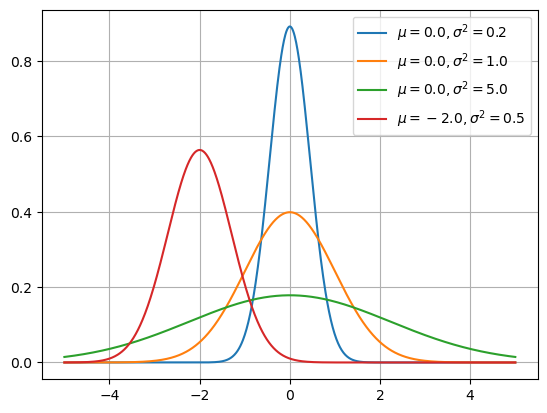

In [178]:
# Create a blank plot
fig, ax = plt.subplots()

# Range of x values
x = np.linspace(-5.0, 5.0, 1001)

# Plot various values for pdf
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

#Add a legend
ax.legend()
#Add grid
ax.grid()

## Area Under the Curve

***

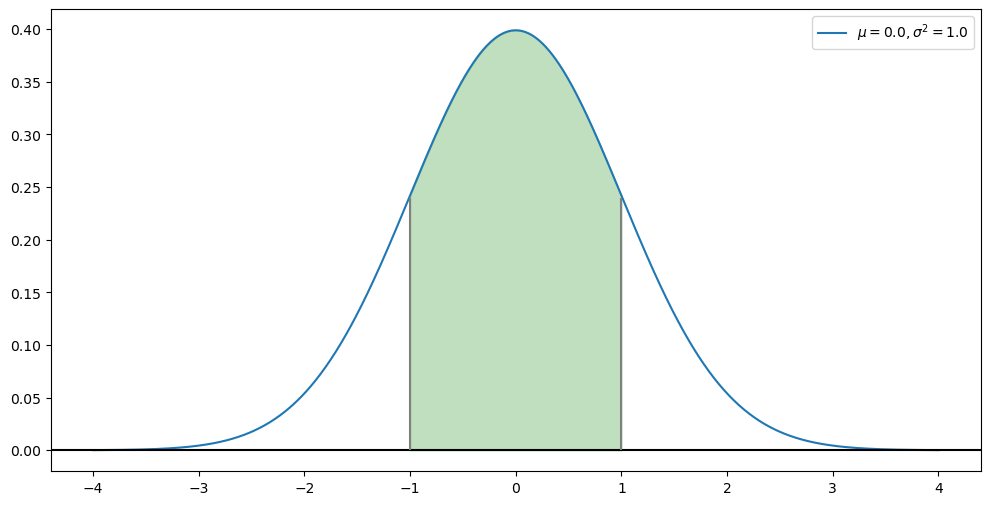

In [179]:
# Create a blank plot
fig, ax = plt.subplots(figsize = (12,6))

# Range of x values
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis
ax.axhline(0.0, color = 'black')

# Add vertical lines
ax.vlines([-1.0, 1.0], 0.0, 0.24, colors="grey")

# x value sbetween vertcal lines
x_interval = np.linspace(-1.0,1.0, 101)

# Shade area under blue curve
ax.fill_between(x_interval, normal_pdf(x_interval), color="green", alpha = 0.25)

# Add a legend
ax.legend()


In [180]:
# The intersection of the grey line with blue line
print(f"(-1.0, {normal_pdf(-1.0)})")
print(f"(1.0, {normal_pdf(1.0)})")

(-1.0, 0.24197072451914337)
(1.0, 0.24197072451914337)


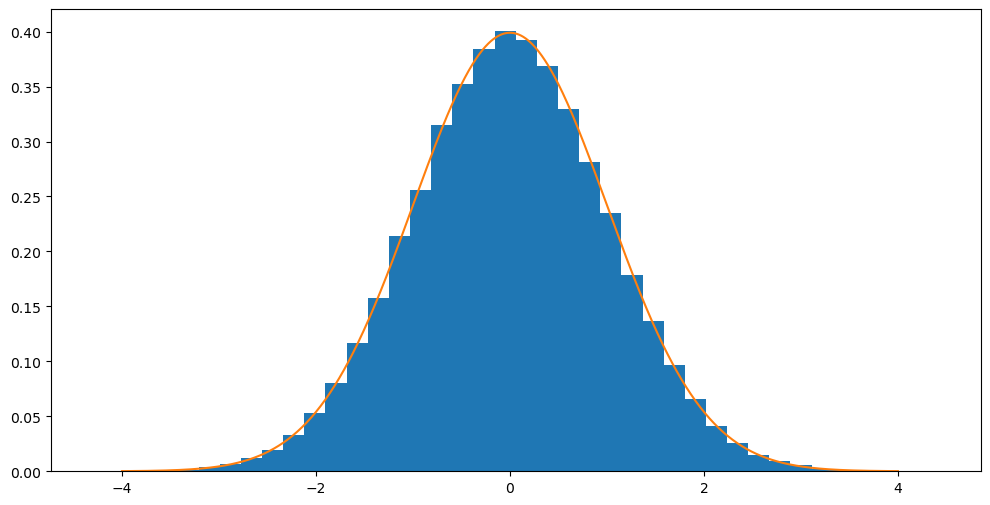

In [181]:
# Generate some random normal data
random_data = np.random.standard_normal(100000)

fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

## Sampling distribution

***

In [182]:
# Generate some random normal data
random_data = np.random.standard_normal((10000, 25))
                                         

# Show
random_data

array([[ 0.42146751, -0.89623702, -0.65565518, ...,  1.42519114,
        -0.68160824,  1.18934314],
       [ 0.33685852, -0.7960571 , -0.21334699, ...,  0.23079497,
         0.53170481, -0.15467228],
       [-0.87783939, -0.09353658, -1.1754846 , ...,  0.31551662,
        -0.26104612,  2.15246898],
       ...,
       [-0.18368503, -1.18121093,  0.42982333, ..., -0.83261436,
        -0.3720211 ,  0.47952138],
       [ 1.83867197, -0.48325453, -0.57507817, ..., -1.42215622,
         1.78614822, -0.6606616 ],
       [ 0.8641683 ,  0.59972533,  1.19318554, ..., -1.40112252,
        -0.14797091,  0.31115579]])

In [183]:
#Mean across the rows
random_data.mean(axis=1)

array([ 0.09775167,  0.18697868,  0.18110629, ..., -0.12380321,
        0.08167842,  0.23472751])

(array([1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.400e+01, 2.300e+01,
        7.900e+01, 1.080e+02, 2.280e+02, 3.430e+02, 5.210e+02, 7.180e+02,
        8.940e+02, 1.078e+03, 1.131e+03, 1.081e+03, 1.066e+03, 8.800e+02,
        6.690e+02, 4.730e+02, 3.010e+02, 2.040e+02, 1.050e+02, 4.100e+01,
        2.200e+01, 8.000e+00, 6.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.86082758, -0.80286174, -0.74489589, -0.68693005, -0.6289642 ,
        -0.57099836, -0.51303251, -0.45506667, -0.39710082, -0.33913497,
        -0.28116913, -0.22320328, -0.16523744, -0.10727159, -0.04930575,
         0.0086601 ,  0.06662595,  0.12459179,  0.18255764,  0.24052348,
         0.29848933,  0.35645517,  0.41442102,  0.47238686,  0.53035271,
         0.58831856,  0.6462844 ,  0.70425025,  0.76221609,  0.82018194,
         0.87814778]),
 <BarContainer object of 30 artists>)

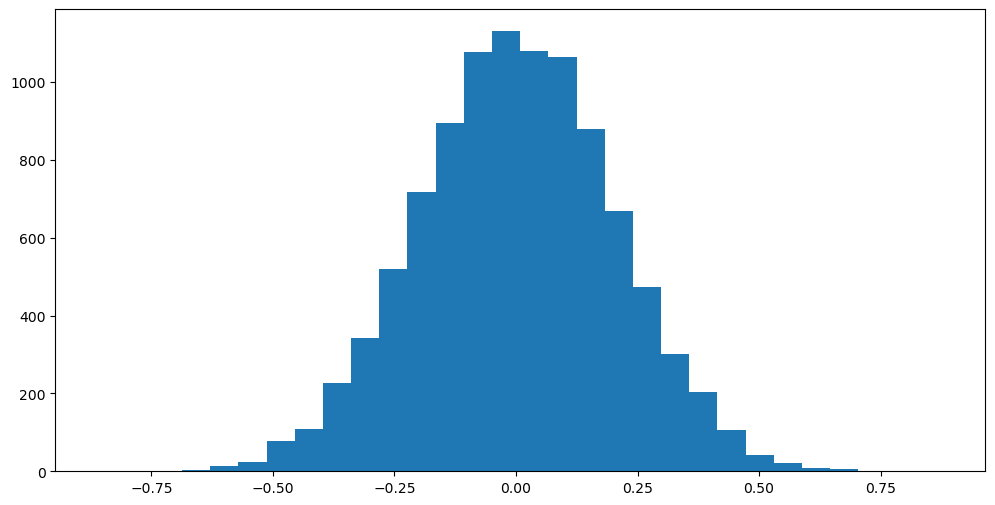

In [184]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis=1), bins=30)

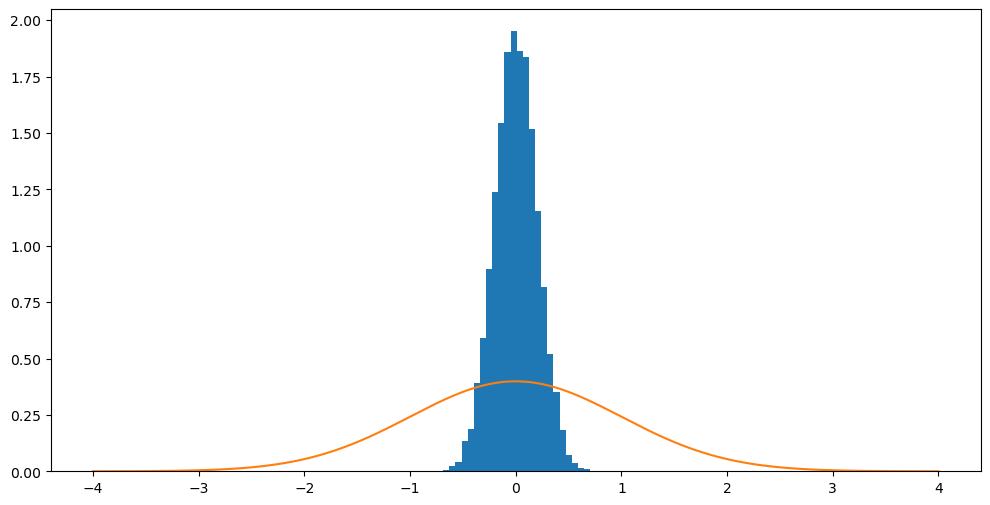

In [185]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis=1), bins=30, density=True)

#Plot Standard normal distributiomn
y = normal_pdf(x)
ax.plot(x, y)

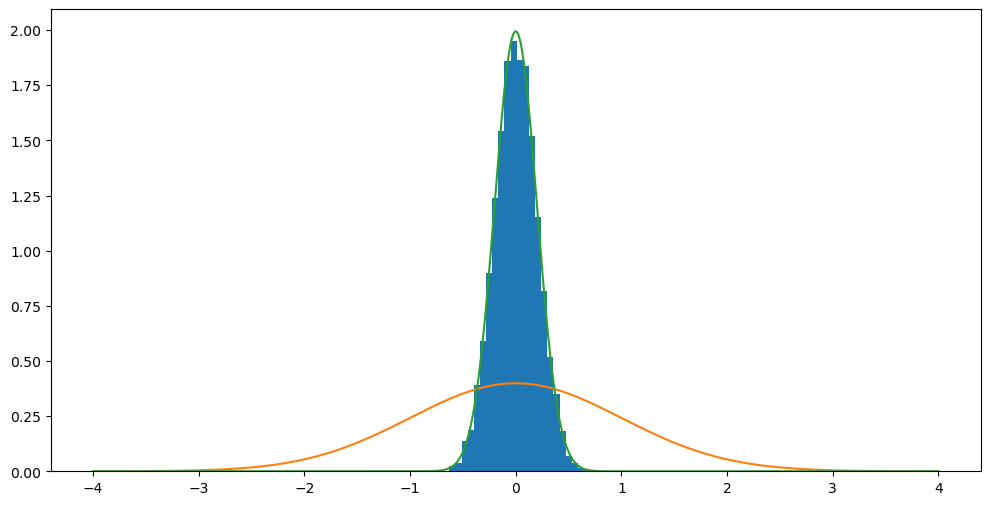

In [186]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot Standard normal distribution
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot Standard normal distribution with mu = 0.0 and sigma = 0.2 (1/ sqrt(25))
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y)

## Random Normal

***

In [187]:
# lets pick a random value

random_mu = np.random.uniform(-3.0, 3.0)

#Show
#random_mu

In [188]:
# Generate some random normal data with this unknown mu
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show
random_data

array([[3.53147075, 4.54820893, 2.68492482, ..., 2.92440334, 3.24206962,
        1.69269959],
       [1.79694021, 2.8036014 , 2.74796589, ..., 1.83267647, 1.22186191,
        1.74998289],
       [3.61322521, 1.9203034 , 5.60135385, ..., 1.20349649, 1.61715993,
        0.31073122],
       ...,
       [2.99422446, 3.6308598 , 1.80641662, ..., 1.46238178, 3.81120691,
        3.31735243],
       [3.09268845, 3.88572833, 3.14760919, ..., 4.2166626 , 3.12004109,
        1.20143912],
       [1.01575625, 1.32269887, 1.55635503, ..., 2.10065209, 0.87128671,
        1.36362205]])

(array([0.00656268, 0.00875024, 0.04593877, 0.03718853, 0.07656461,
        0.1487541 , 0.23625651, 0.35657233, 0.61032933, 0.76783367,
        1.10909308, 1.28847303, 1.54441759, 1.84411335, 1.87036408,
        1.90974016, 2.02568086, 1.75223582, 1.70192193, 1.29941083,
        0.98221459, 0.77658391, 0.57751593, 0.43313694, 0.21000579,
        0.13562874, 0.06562681, 0.02843828, 0.01312536, 0.01312536]),
 array([1.70780935, 1.75352238, 1.7992354 , 1.84494843, 1.89066145,
        1.93637448, 1.9820875 , 2.02780053, 2.07351355, 2.11922658,
        2.1649396 , 2.21065263, 2.25636565, 2.30207868, 2.34779171,
        2.39350473, 2.43921776, 2.48493078, 2.53064381, 2.57635683,
        2.62206986, 2.66778288, 2.71349591, 2.75920893, 2.80492196,
        2.85063498, 2.89634801, 2.94206103, 2.98777406, 3.03348708,
        3.07920011]),
 <BarContainer object of 30 artists>)

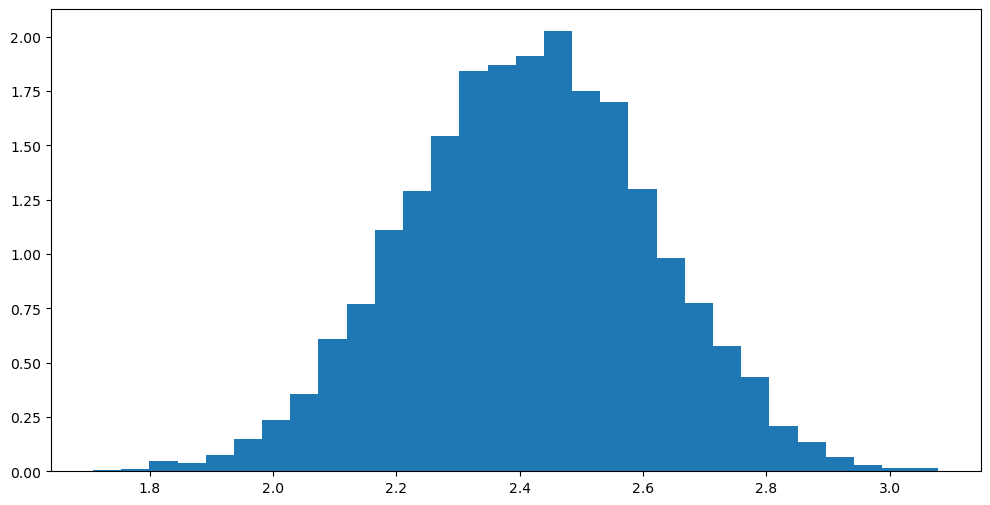

In [189]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis=1), bins=30, density=True)

In [190]:
# Estimate random_mu from abobe histogram
# Now look at the value

random_mu

2.4145803512508186

In [191]:
# A random sample of size 50.
sample = np.random.normal(random_mu, 1.0, 50)

# show
sample

array([ 0.68826451,  2.9402198 ,  2.82301652,  1.56493805,  3.43421418,
        2.20642197, -0.34782575,  2.39598572,  2.35563581,  3.23660848,
        1.82586114,  1.80464857,  1.56669268,  0.16688198,  4.17975294,
        3.30863518,  0.23406242,  2.03848352,  2.37176219,  2.48369929,
        0.76732265,  2.61825579,  2.83792225,  2.80803956,  2.21410735,
        1.06158298,  2.53873323,  3.97596431,  2.51045012,  2.85588984,
        3.34970766,  1.90063785,  0.21976281,  2.18630229,  2.61189445,
        1.31002985,  2.44231125,  1.98993632,  3.12241721,  2.00382546,
        3.16305558,  1.89333448,  2.57518443,  1.59404537,  1.45399569,
        3.36346157,  1.81326861,  1.94883184,  1.74471789,  1.72581726])

In [192]:
# Calculate the mean of the sample
sample.mean()

2.157575303345792

## Independent Samples t-test

***

In [193]:
# Load Iris
df = pd.read_csv('notes/data/iris.csv')

# Show
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [194]:
# Setosa petal length

sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [195]:
# Virginica petal length

sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [196]:
# t-test
ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

***

## End